In [29]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
# Arvore de decisão
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from io import StringIO
#from sklearn.externals.six import StringIO 
import pydotplus
import matplotlib.image as mping
from IPython.display import Image


In [30]:
df=pd.read_csv('train.csv')
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Jeep,Wrangler Sport,2014,"71,000 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000
1,Toyota,Highlander XLE,2015,"68,575 mi.",Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995
3,Subaru,Outback Touring XT,2021,"33,500 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000
4,Lexus,GX 460 Base,2018,"75,000 mi.",Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095


In [31]:
df=df.dropna() 
df.shape[0]

2616

In [32]:
print('Total de registros',df.shape[0])
print('Total de acidentes',df[df['accident']=='At least 1 accident or damage reported'].shape[0])
print('Total de não acidentes',df[df['accident']=='None reported'].shape[0])



Total de registros 2616
Total de acidentes 753
Total de não acidentes 1863


In [33]:
import re
valores_corrigidos=[]
for milage in df['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

df['milage']=valores_corrigidos

In [35]:
# separando label(categoria_price) das features(resto)

# etiquetas:
Y= df['accident'].values # .values par converter do df em array numpy
Y
X = df[['price','model_year','milage']].values # array de arrays
X


array([[ 22000,   2014,  71000],
       [ 26000,   2015,  68575],
       [ 23995,   2018,  69641],
       ...,
       [ 32999,   2014,  76850],
       [ 45000,   2018,  74150],
       [ 18000,   2001, 125000]], dtype=int64)

In [36]:
# dividir o dataset em 2: dataset de treino(80%) e dataset de teste(20%)
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3)
X_teste

array([[  8500,   2017, 145000],
       [  9499,   2014,  60109],
       [  9500,   1999,  48054],
       ...,
       [ 54995,   2019,  59271],
       [ 10900,   2012, 152520],
       [  7500,   2006, 170000]], dtype=int64)

In [41]:
# criar o algoritmo de árvore de decisão:
import sklearn.tree
algoritmo_arvore=sklearn.tree.DecisionTreeClassifier(criterion='entropy', max_depth=3) #max_deph=5 altura max da arvore
#treinar o algoritmo:
modelo=algoritmo_arvore.fit(X_treino, Y_treino)
# o modelo é o algoritmo treinado


#### A árvore de decisão é um algoritmo white box, ou seja, um modelo que podemos entender melhor o que ele aprendeu e \n como ele decide. Podemos mostrar a árvore:

In [38]:
import os
os.environ["GRAPHVIZ_DOT"] = r"C:\Users\Utilizador\OneDrive - Universidade do Minho\linguagens\Graphviz\bin\dot.exe"


modelo.feature_importances_
nome_features=['price','model_year','milage']
nome_classes=modelo.classes_
print(nome_classes)

#Montar a imagem da arvore
dot_data=StringIO()
#dot_data = tree.export_graphviz(modelo, out_file=None, feature_names=nome_features)
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')

['At least 1 accident or damage reported' 'None reported']


InvocationException: GraphViz's executables not found

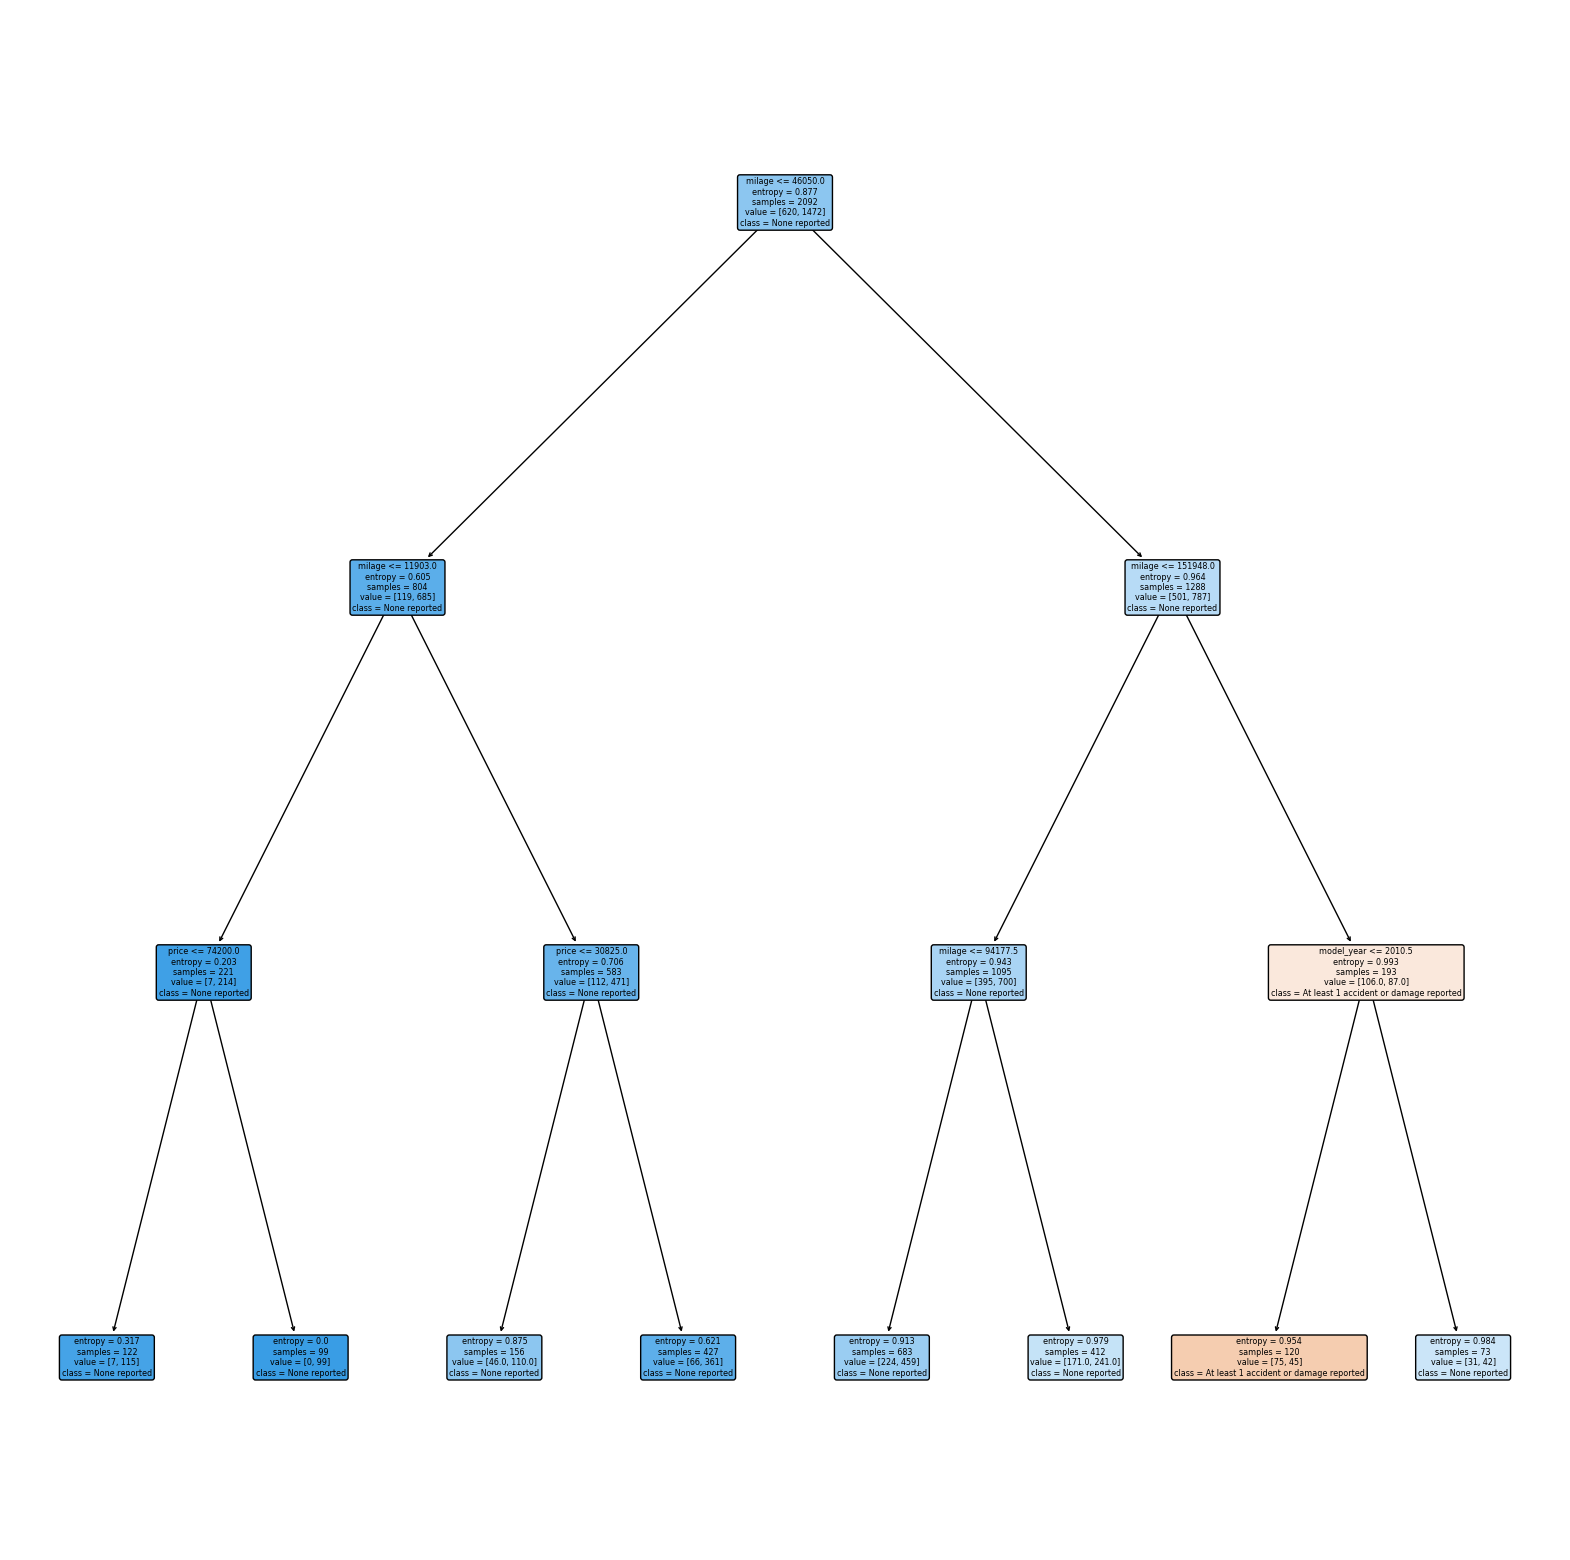

In [43]:

from sklearn.tree import plot_tree

nome_features = ['price','model_year','milage','fuel_type']
nome_classes = modelo.classes_

plt.figure(figsize=(20,20))  # Ajuste o tamanho da figura conforme necessário
plot_tree(modelo, feature_names=nome_features, class_names=nome_classes, filled=True, rounded=True)
plt.show()

Feature ranking:
1. feature 2 (0.882418)
2. feature 0 (0.088161)
3. feature 1 (0.029421)


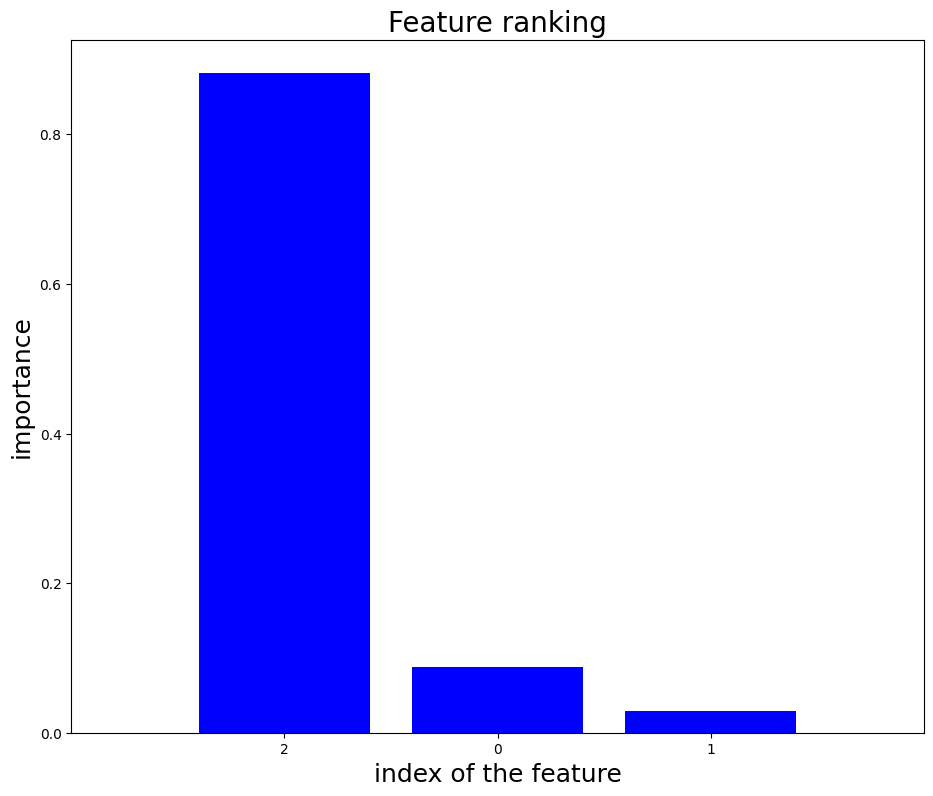

In [44]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()


In [47]:
# aplicando o modelo na base de teste
Y_predicoes=modelo.predict(X_teste)

#Avaliação do modelo
# Avaliar o valor real do dataset Y_teste com as prediçoes
print('Acurácia da árvore:', accuracy_score(Y_teste, Y_predicoes)) # % em que o modelo consegue acertar
print(classification_report(Y_teste, Y_predicoes))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE, QUANTAS ERAM CORRETAS?
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE, QUANTOS O MODELO CONSEGUIU CLASSIFICAR CORRETAMENTE?

#Precisão: Imagine que você está tentando prever se choverá ou não amanhã. A precisão mede o quão preciso é o seu palpite quando você diz "sim, vai chover". Se você disser que vai chover 10 vezes, e apenas 6 dessas vezes realmente choverem, sua precisão é de 60%. Basicamente, a precisão responde à pergunta: "Quando eu prevejo que vai chover, quantas vezes eu acerto?"

#Recall: Agora, vamos pensar no recall. Ele mede o quão bem você consegue capturar todos os casos positivos. Ainda usando o exemplo da previsão de chuva, o recall responde à pergunta: "De todas as vezes que realmente choveu, quantas vezes eu previ corretamente que ia chover?"

Acurácia da árvore: 0.7557251908396947
                                        precision    recall  f1-score   support

At least 1 accident or damage reported       0.63      0.09      0.16       133
                         None reported       0.76      0.98      0.86       391

                              accuracy                           0.76       524
                             macro avg       0.70      0.54      0.51       524
                          weighted avg       0.73      0.76      0.68       524



Matriz de Confusão sem normalizacão 
[[ 12 121]
 [  7 384]]


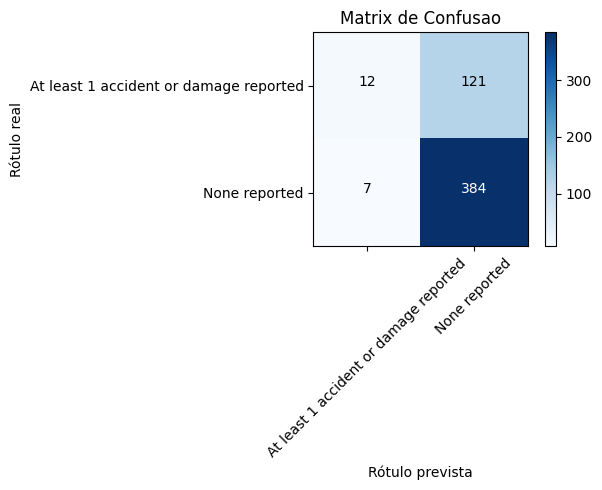

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')

# tenho 133 acidentes reportados, só identifiquei 12